<h1 style="text-align:center">Eigenvalue/Eigenvector Analysis <br>for Undamped Systems</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/TwoMass_3spring.png" alt="A Two-Mass-Spring System" width=50%/></a><br>
    <strong> Figure 1: A Two-Mass-Spring System</strong>
</p>

This notebook demonstrates the eigenvalue/eigenvector problem using a two-mass-spring-damper system shown in Figure 1. We'll just look at one example set of parameters. The same techniques apply for other parameters and for larger matrices. 

The equations of motion for the system are:

$ \quad m_1 \ddot{x}_1 + (k_1+k_2)x_1 - k_2 x_2 = 0 $

$ \quad m_2 \ddot{x}_2 -k_2 x_1 +(k_2 + k_3)x_2 = 0 $

We could also write these equations in matrix form:

$ \quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} + \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$

Define

$ \quad M = \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix} $

and 

$ \quad K = \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix} $

Using $M$ and $K$, we want to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = 0 $ 

for $\bar{X}$. This is an eigenvalue problem.

For information on how to obtain these equations, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the [Scipy version of the linear algebra module](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.linalg.eigh.html). It allows us to solve the "general" eignevalue problem.

In [1]:
import numpy as np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Let's also improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

To see how to solve this eigenvalue problem, we will use the parameters from the example in the book, set up below. All three spring constants are equal and the two masses are equal.

In [4]:
# Define the matrices
m1 = 1.0
m2 = 1.0

k1 = 4.0 
k2 = 4.0
k3 = 4.0

M = np.asarray([[m1, 0],
                [0,  m2]])

K = np.asarray([[k1 + k2, -k2],
                [-k2,      k2 + k3]])

In [5]:
# We'll use the scipy version of the linear algebra
from scipy import linalg

eigenvals, eigenvects = linalg.eigh(K,M)


The linalg.eigh function returns two arrays, one of the eigenvalues and one of the eigenvectors. The eigenvalues are the square of the two natural frequencies. The eigenvectors are returned in normalized form, with each "column" of the array representing an eigenvector.


In [6]:
print('\n')
print('The resulting eigenalues are {:.2f} and {:.2f}.'.format(eigenvals[0], eigenvals[1]))
print('\n')
print('So the two natrual frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1])))
print('\n')



The resulting eigenalues are 4.00 and 12.00.


So the two natrual frequencies are 2.00rad/s and 3.46rad/s.




In [7]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')



The first eigenvector is [-0.707 -0.707].


The second eigenvector is [-0.707  0.707].




# Responses
Now, let's look at the response and see how it reflects these two modes

In [8]:
# Define the equations of motion

# Define the system as a series of 1st order ODEs (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k1, k2, k3]
    """
    x1, x1_dot, x2, x2_dot = w
    m1, m2, k1, k2, k3 = p

    # Create sysODE = (x1', x1_dot', x2', x2_dot')
    sysODE = [x1_dot,
             (-(k1+k2)*x1 + k2*x2) / m1,
             x2_dot,
             (k2*x1 - (k2+k3)*x2) / m2]
    
    return sysODE

In [9]:
# Import the ODE solver
from scipy.integrate import odeint  

# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

## Mode 1
Let's start by looking at the first mode. For this set of parameters ($m_1 = m_2$ and $k_1 = k_2 = k_3$), the two masses move identically. To excite only this mode, we'll choose initial conditions that exactly match the mode shape.

Here, we'll choose:

$ \quad x_1(0) = x_2(0) = x_0$

and 

$ \quad \dot{x}_1(0) = \dot{x}_2(0) = 0$

In [10]:
# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = 0.5                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

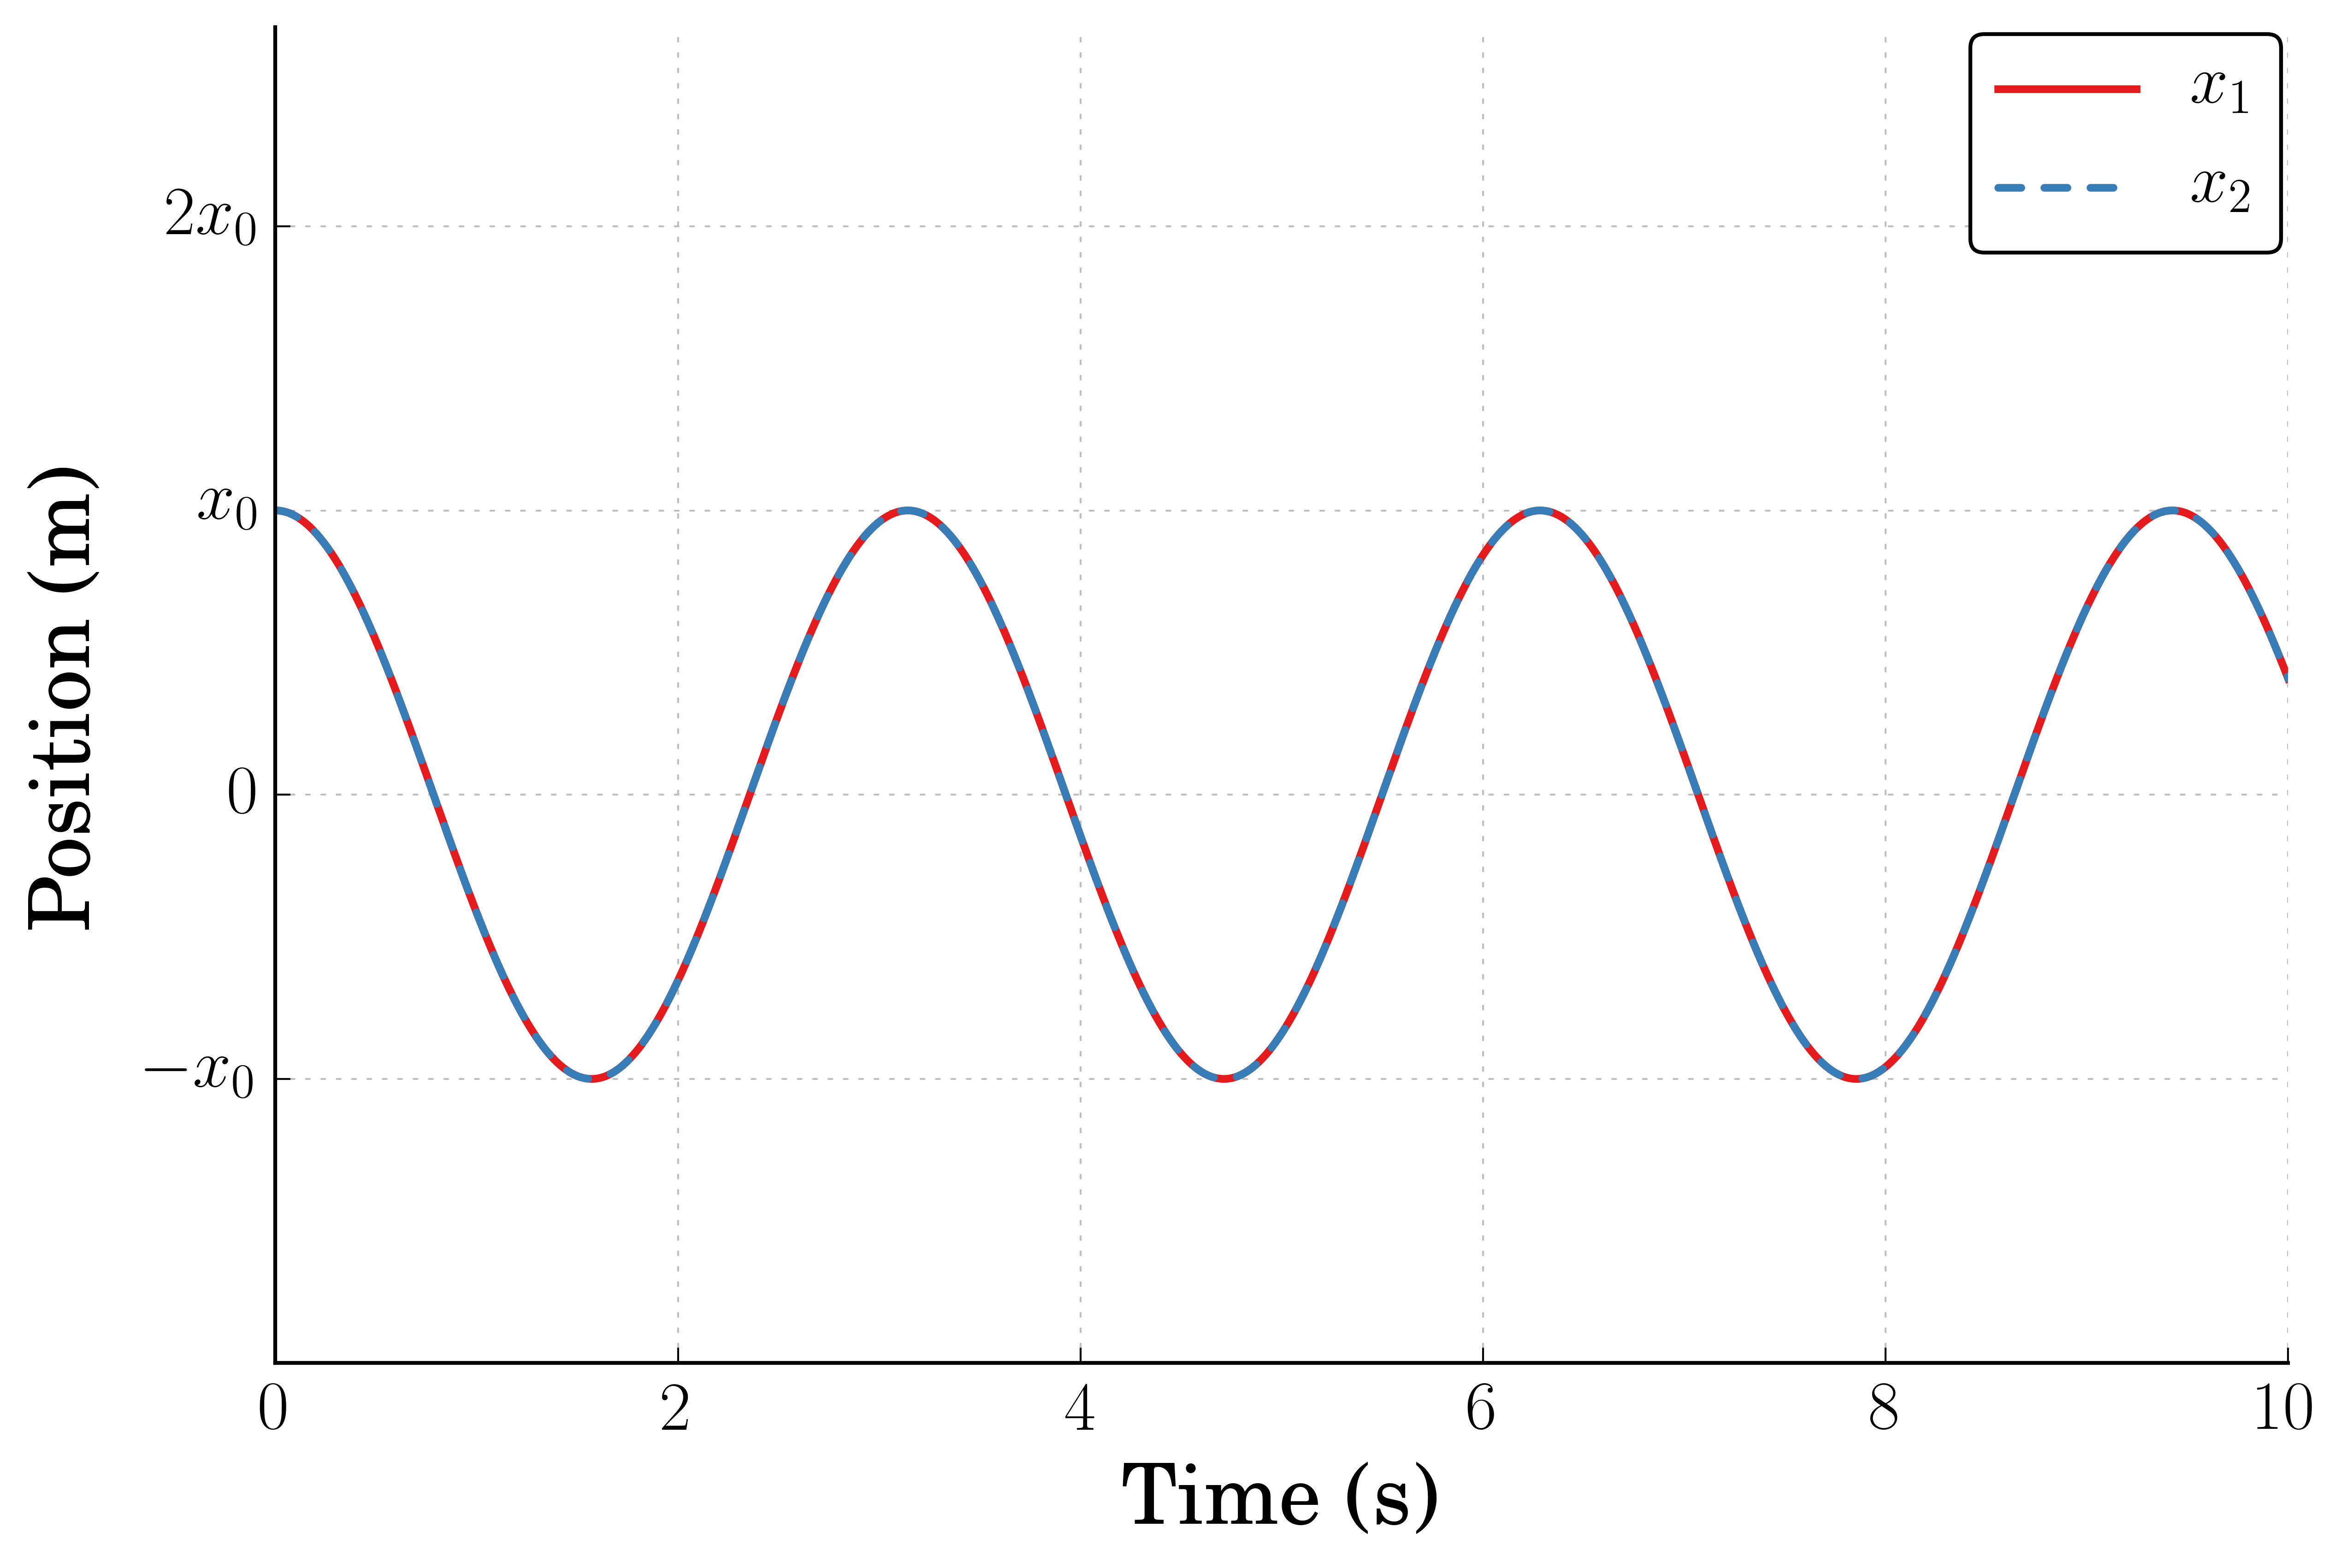

In [11]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('FreeVibration_mode_1.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Mode 2
Now, let's look at the second mode. For this set of parameters ($m_1 = m_2$ and $k_1 = k_2 = k_3$), the two masses move exactly opposite of one another in the second mode. To excite only this mode, we'll choose initial conditions that exactly match the mode shape.

Here, we'll choose:

$ \quad x_1(0) = x_2(0) = x_0$

and 

$ \quad \dot{x}_1(0) = \dot{x}_2(0) = 0$

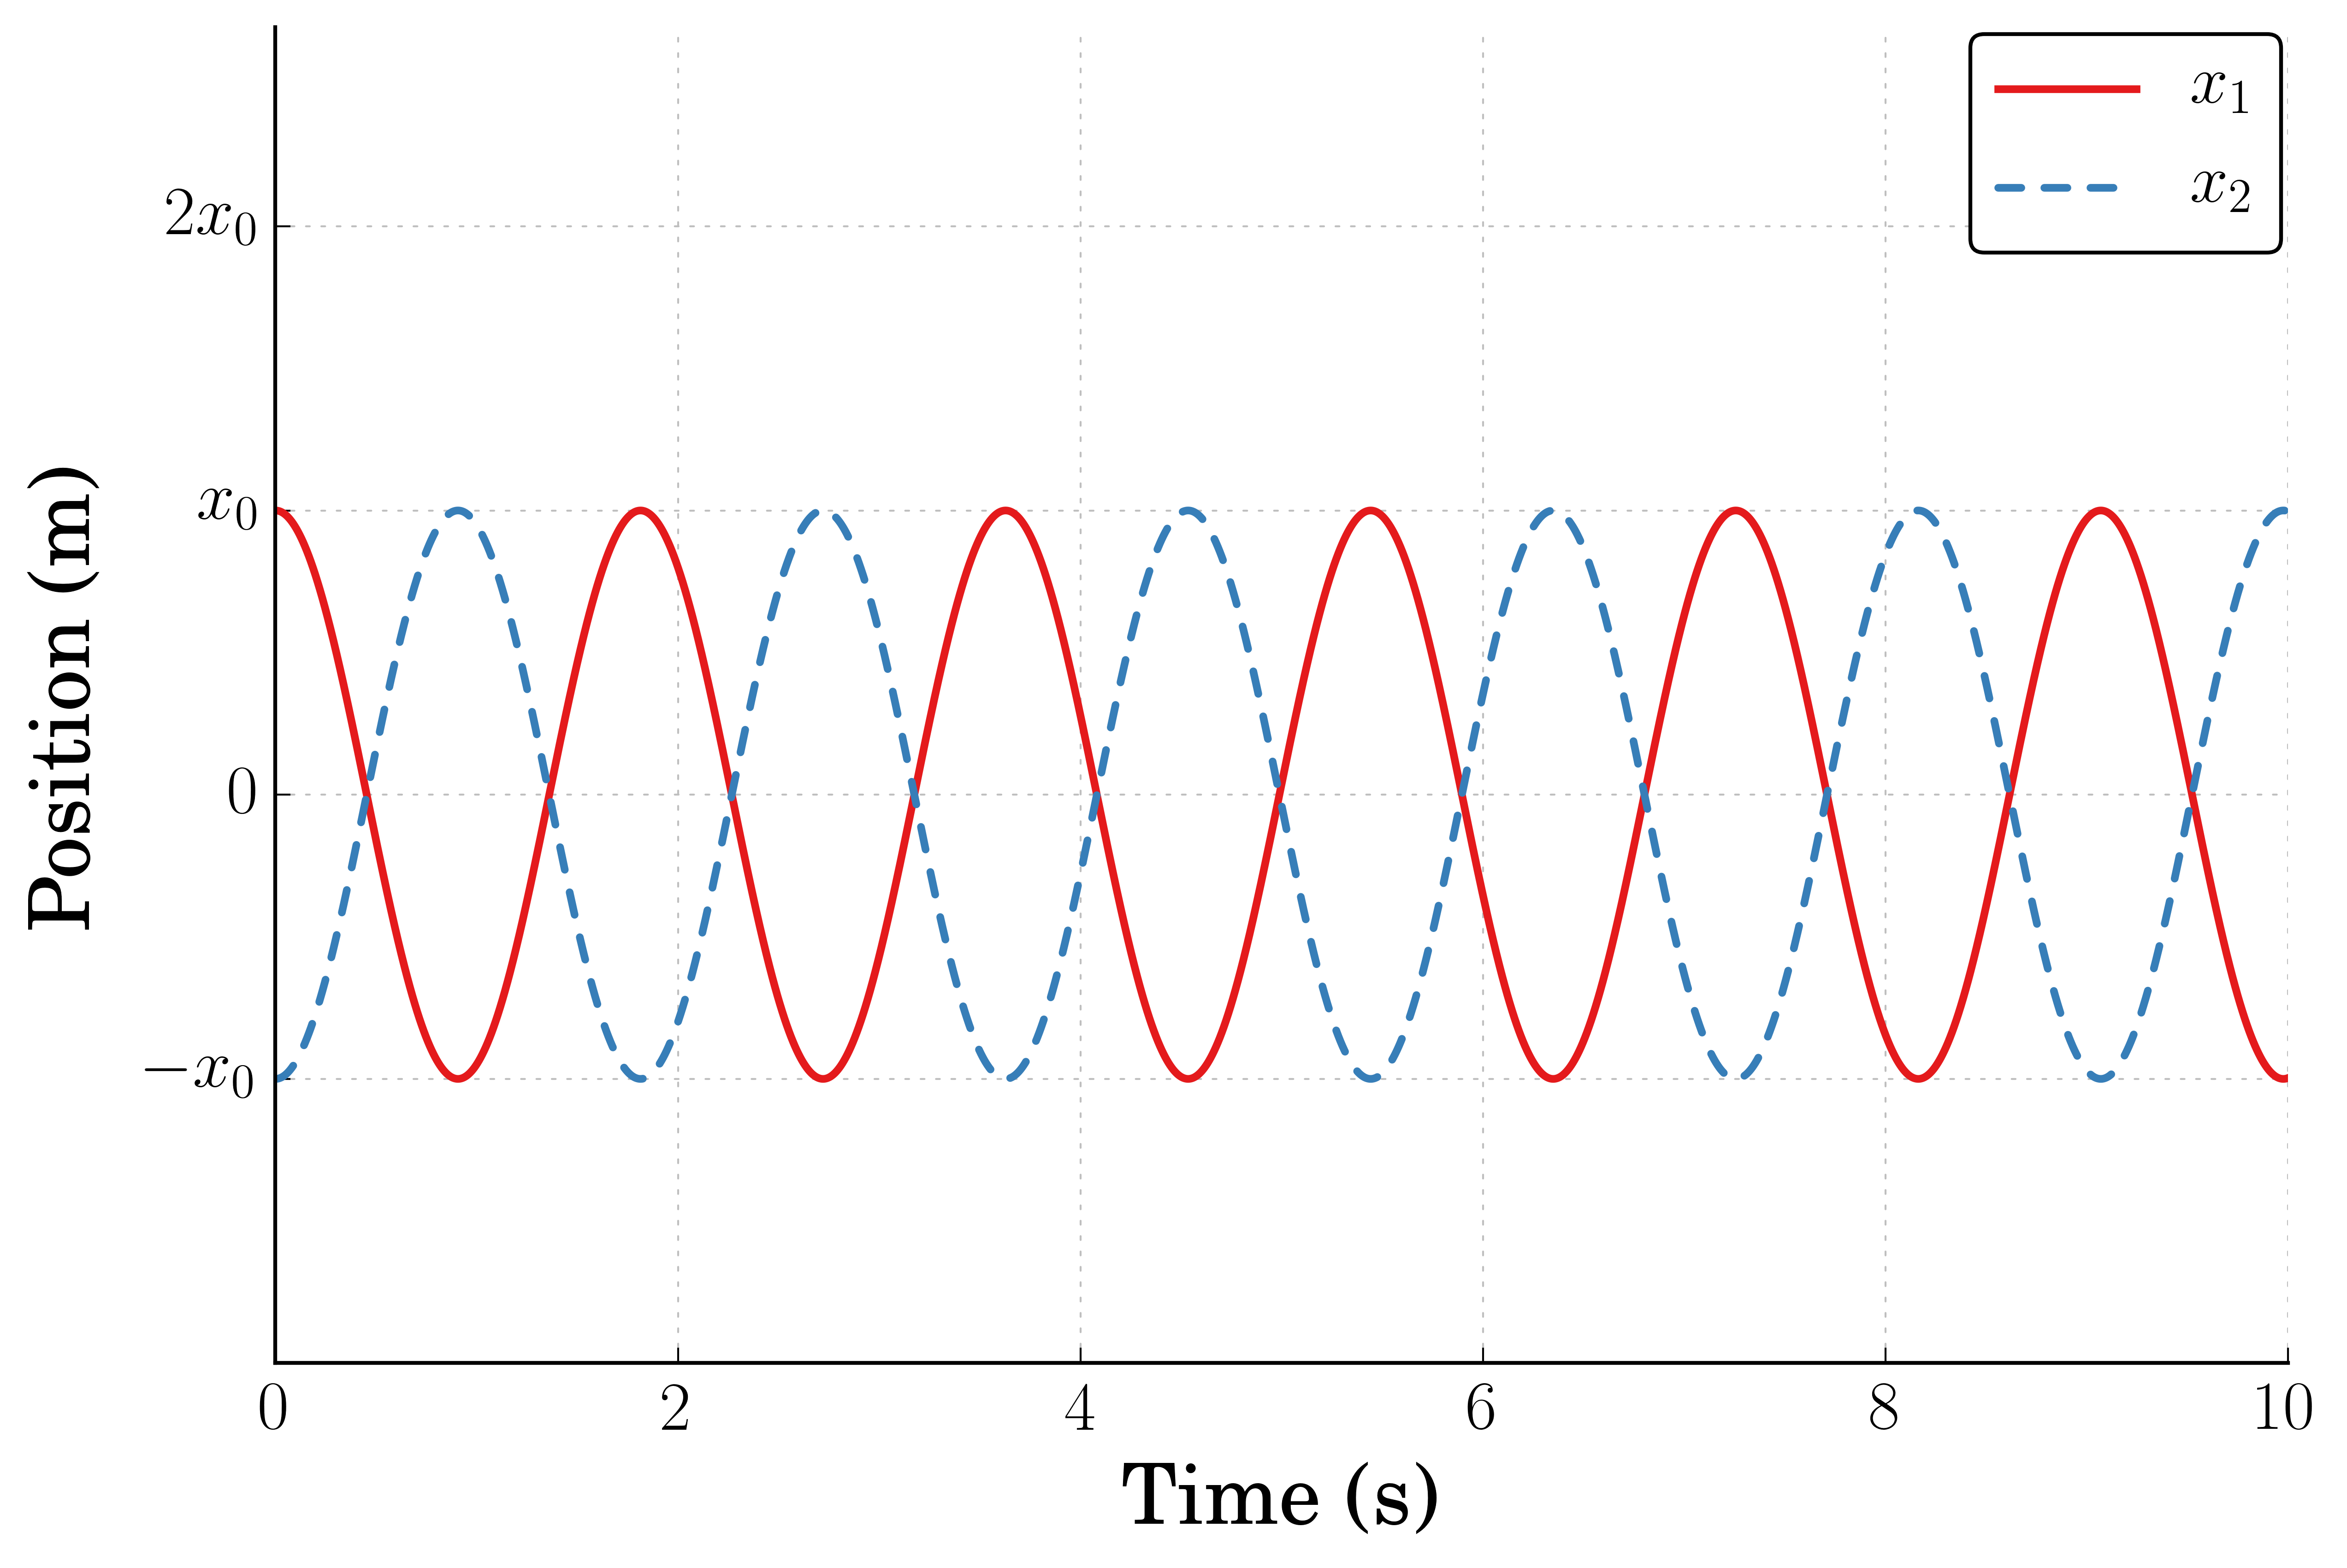

In [12]:
# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = -0.5                      # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('FreeVibration_mode_2.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Both modes
For any input that does not match a mode shape, both modes will be excited. 

Here, we'll choose:

$ \quad x_1(0) = x_0$, 

$ \quad x_2(0) = 0$

and 

$ \quad \dot{x}_1(0) = \dot{x}_2(0) = 0$

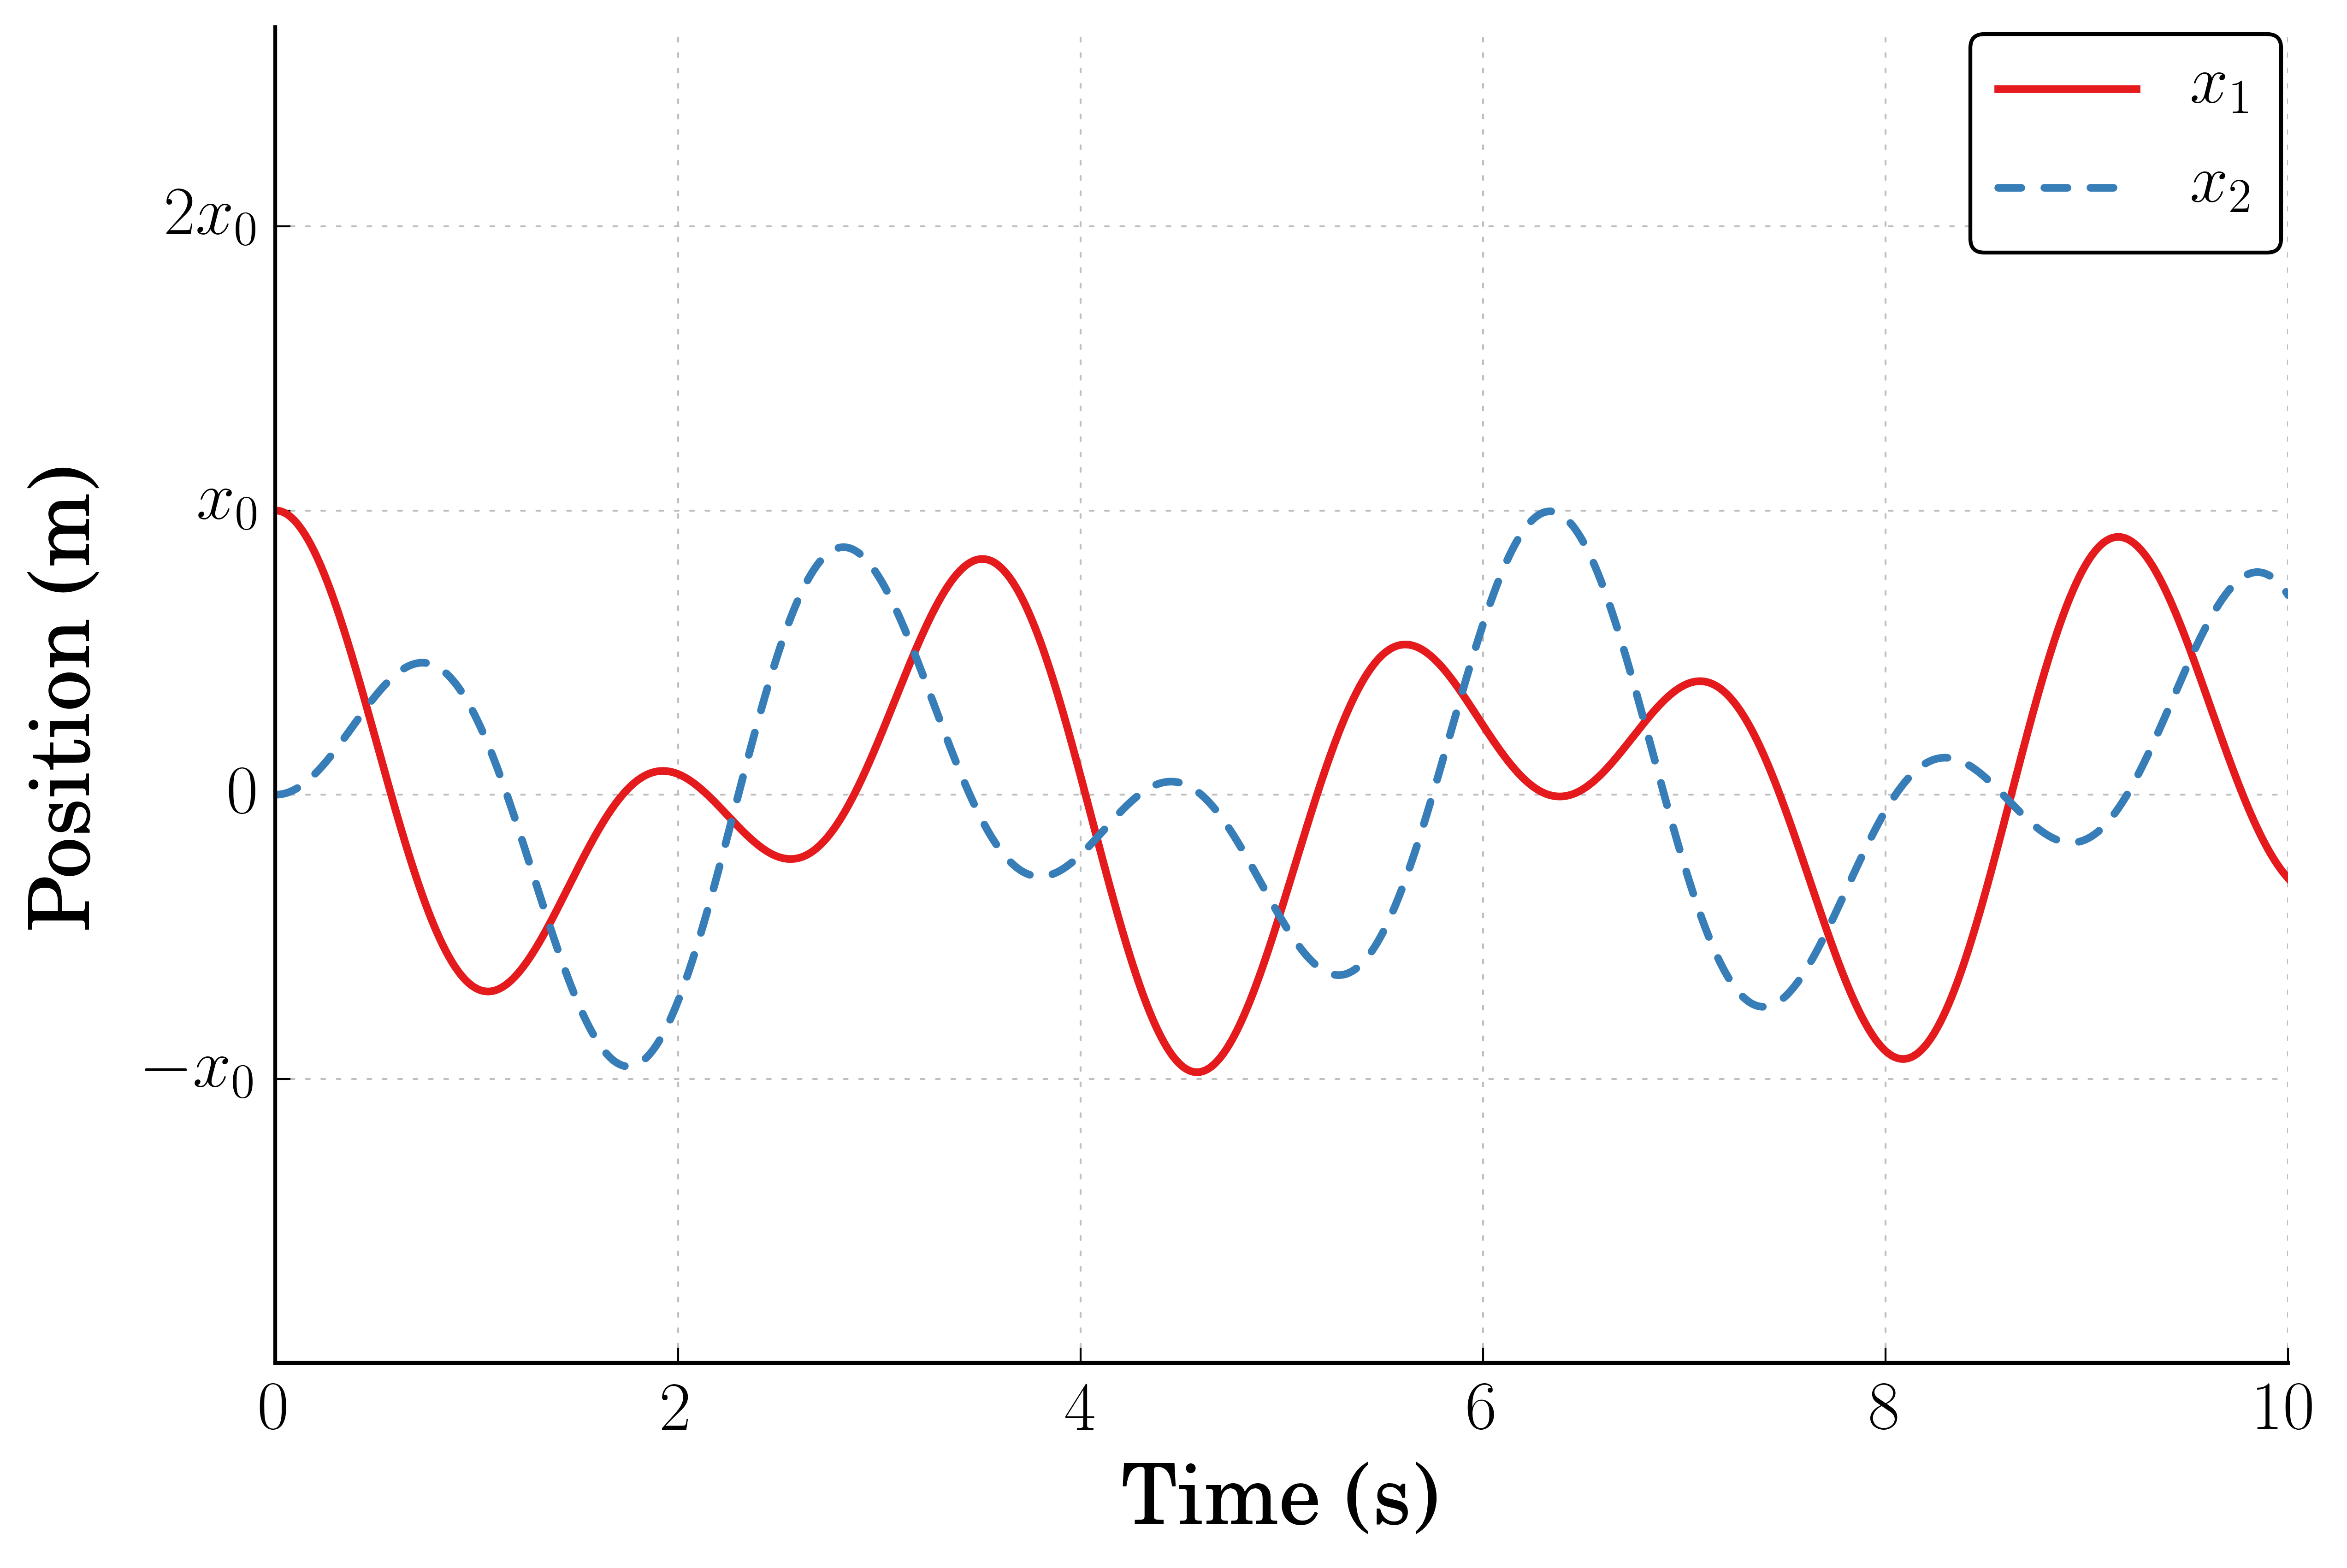

In [13]:
# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = 0                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('FreeVibration_BothModes.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.



In [14]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())